<a href="https://colab.research.google.com/github/tsparaskevas/DataJournalism/blob/main/Scraping%20(BBC)/Scraping_(BBC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scraping με τις βιβλιοθήκες requests και beautiful soup

## Εισαγωγή

Σ' αυτή την ενότητα θα δούμε πώς μπορούμε να φέρουμε τα περιεχόμενα μιας ιστοσελίδας στον υπολογιστή μας, ώστε να μπορούμε στη συνέχεια να τα επεξεργαστούμε και να τα αναλύσουμε.

*(μπορούμε να φέρουμε πολλές -ακόμα και όλες τις- ιστοσελίδες από ένα site, αλλά οι πολλές ιστοσελίδες είναι απλώς πολλές μοναδικές)*

### Ποια είναι η διαδικασία;

1. Εντοπίζουμε και επισκοπούμε την ιστοσελίδα που μας ενδιαφέρει
2. Φέρνουμε (κατεβάζουμε) το σύνολο των περιεχομένων της ιστοσελίδας στον υπολογιστή μας
3. Επιλέγουμε και αντλούμε από το σύνολο των περιεχομένων της ιστοσελίδας μόνο εκείνα τα στοιχεία που μας ενδιαφέρουν
4. Κατασκευάζουμε έναν οργανωμένο πίνακα με τα στοιχεία που μας ενδιαφέρουν και τον αποθηκεύουμε για μελλοντική επεξεργασία. 




###Τι θα κάνουμε σήμερα;
Σήμερα θα μαζέψουμε όλα τα άρθρα από την πρώτη σελίδα του bbc (https://www.bbc.com/news) και θα φτιάξουμε έναν πίνακα με τα εξής στοιχεία για το κάθε άρθρο: τον **τίτλο**, το **url** και την **περίληψη**.

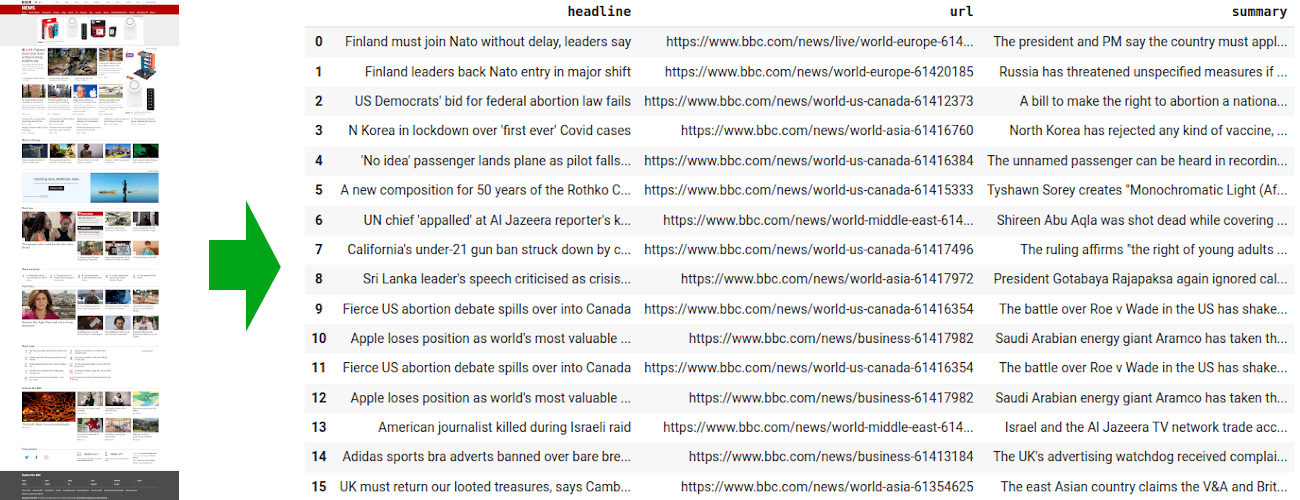

O κώδικας στην python για να φτάσουμε από την ιστοσελίδα (αριστερά στην παραπάνω εικόνα) στο dataframe (δεξιά στην εικόνα), παρατίθεται αμεσως παρακάτω. 

In [ ]:
#####################################################
########   BBC Categories - Scraping code   #########
#####################################################

import requests
from bs4 import BeautifulSoup

response = requests.get('https://www.bbc.com/news') 
soup = BeautifulSoup(response.text, 'html.parser')  

stories = soup.find_all('div', { 'class': 'gs-c-promo' }) 

stories_list = [] 

for story in stories: 
    story_dict = {} 
    h3 = story.find('h3') 
    if h3: 
      story_dict['headline'] = h3.text 
    a = story.find('a') 
    if a: 
      story_dict['url'] = "https://bbc.com" + a['href'] 
    p = story.find('p') 
    if p: 
      story_dict['summary'] = p.text 
    
    stories_list.append(story_dict)

print(stories_list) 

import pandas as pd

df = pd.DataFrame(stories_list)
df

[{'headline': 'Putin humiliating himself on the world stage - UK', 'url': 'https://bbc.com/news/live/world-europe-61404062', 'summary': 'Foreign Secretary Liz Truss urges allies to further sanction Russia over its invasion of Ukraine.'}, {'headline': 'CCTV shows Russian soldiers killing Ukrainian civilians', 'url': 'https://bbc.com/news/world-europe-61425025', 'summary': 'The incident, captured on video seen by the BBC, is being investigated as a suspected war crime.'}, {'headline': 'North Korea announces first death from Covid-19', 'url': 'https://bbc.com/news/world-asia-61432084', 'summary': 'A day after confirming its first cases, state media reports thousands are suffering fever symptoms.'}, {'headline': 'California mansions burn as wildfires spread', 'url': 'https://bbc.com/news/world-us-canada-61430573', 'summary': 'Across North America, wildfire crews are gearing up for a particularly difficult season.'}, {'headline': 'US paratrooper killed in Alaska bear attack', 'url': 'https:

,headline,url,summary
0,Putin humiliating himself on the world stage - UK,https://bbc.com/news/live/world-europe-61404062,Foreign Secretary Liz Truss urges allies to fu...
1,CCTV shows Russian soldiers killing Ukrainian ...,https://bbc.com/news/world-europe-61425025,"The incident, captured on video seen by the BB..."
2,North Korea announces first death from Covid-19,https://bbc.com/news/world-asia-61432084,"A day after confirming its first cases, state ..."
3,California mansions burn as wildfires spread,https://bbc.com/news/world-us-canada-61430573,"Across North America, wildfire crews are geari..."
4,US paratrooper killed in Alaska bear attack,https://bbc.com/news/world-us-canada-61432239,"Staff Sgt Seth Michael Plant, a veteran of the..."
5,India couple sue son for not giving them a gra...,https://bbc.com/news/world-asia-india-61424869,The Indian parents say they used up their savi...
6,First picture of monster black hole in our galaxy,https://bbc.com/news/science-environment-61412463,Astronomers reveal the first ever image of the...
7,Ireland fail to make Eurovision Song Contest f...,https://bbc.com/news/entertainment-arts-61428830,"Ireland go home after Thursday's semi-final, d..."
8,Twitter executives ousted ahead of Musk takeover,https://bbc.com/news/business-61432742,One of the senior executives was on parental l...
9,Russia threatens retaliation for Finland Nato ...,https://bbc.com/news/world-europe-61420185,Finland's leaders say they want the country to...


Όπως βλέπουμε, το μαγικό εκτελείται με μόνο λίγες γραμμές κώδικα (τον οποίο θα εξηγήσουμε παρακάτω). 

Επίσης, βλέπουμε ότι εκτός από την αρχική σελίδα του bbc.com, ο κώδικας δουλεύει και για άλλες σελίδες κατηγοριών άρθρων του bbc, π.χ. από τη σελίδα της κατηγορίας World: https://www.bbc.com/news/world.

In [ ]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://www.bbc.com/news/world') # αλλάζουμε το url για να φέρουμε το περιέχομενο της κατηγορίας World
soup = BeautifulSoup(response.text, 'html.parser')  

stories = soup.find_all('div', { 'class': 'gs-c-promo' }) 

stories_list = [] 

for story in stories: 
    story_dict = {} 
    h3 = story.find('h3') 
    if h3: 
      story_dict['headline'] = h3.text 
    a = story.find('a') 
    if a: 
      story_dict['url'] = "https://bbc.com" + a['href'] 
    p = story.find('p') 
    if p: 
      story_dict['summary'] = p.text 
    
    stories_list.append(story_dict)

print(stories_list) 

import pandas as pd

df = pd.DataFrame(stories_list)
df

[{'headline': 'CCTV shows Russian soldiers killing Ukrainian civilians', 'url': 'https://bbc.com/news/world-europe-61425025', 'summary': 'The incident, captured on video seen by the BBC, is being investigated as a suspected war crime.'}, {'headline': 'CCTV shows Russian soldiers killing Ukrainian civilians', 'url': 'https://bbc.com/news/world-europe-61425025', 'summary': 'The incident, captured on video seen by the BBC, is being investigated as a suspected war crime.'}, {'headline': 'Putin humiliating himself on the world stage - UK', 'url': 'https://bbc.com/news/live/world-europe-61404062'}, {'headline': 'North Korea announces first death from Covid-19', 'url': 'https://bbc.com/news/world-asia-61432084', 'summary': 'A day after confirming its first cases, state media reports thousands are suffering fever symptoms.'}, {'headline': 'Medical leave for painful periods in new Spain law', 'url': 'https://bbc.com/news/world-europe-61429022', 'summary': 'Spain could become the first European 

,headline,url,summary
0,CCTV shows Russian soldiers killing Ukrainian ...,https://bbc.com/news/world-europe-61425025,"The incident, captured on video seen by the BB..."
1,CCTV shows Russian soldiers killing Ukrainian ...,https://bbc.com/news/world-europe-61425025,"The incident, captured on video seen by the BB..."
2,Putin humiliating himself on the world stage - UK,https://bbc.com/news/live/world-europe-61404062,NaN
3,North Korea announces first death from Covid-19,https://bbc.com/news/world-asia-61432084,"A day after confirming its first cases, state ..."
4,Medical leave for painful periods in new Spain...,https://bbc.com/news/world-europe-61429022,Spain could become the first European country ...
5,Ireland fail to make Eurovision Song Contest f...,https://bbc.com/news/entertainment-arts-61428830,"Ireland go home after Thursday's semi-final, d..."
6,India couple sue son for not giving them a gra...,https://bbc.com/news/world-asia-india-61424869,The Indian parents say they used up their savi...
7,First picture of monster black hole in our galaxy,https://bbc.com/news/science-environment-61412463,Astronomers reveal the first ever image of the...
8,CCTV shows Russian soldiers killing Ukrainian ...,https://bbc.com/news/world-europe-61425025,"The incident, captured on video seen by the BB..."
9,Putin humiliating himself on the world stage - UK,https://bbc.com/news/live/world-europe-61404062,NaN


**Άσκηση**:

Πειραματιστείτε, βάζοντας στον κώδικα το url άλλων κατηγοριών άρθρων από την ιστοσελίδα του bbc (π.χ. Health, Technology κλπ.) και δείτε αν δουλεύει. 

In [ ]:
# Αντιγράψτε εδώ τον παραπάνω κώδικα του BBC Categories - Scraping Code και αλλάξτε το url στο requests.get()





Αν δοκιμάσουμε όμως να τρέξουμε τον ίδιο κώδικα σε μια σελίδα άρθρου του bbc, π.χ. από τη σελίδα https://www.bbc.com/news/world-us-canada-61301910, δεν δουλεύει.

*Για να είμαστε ακριβείς, δουλεύει, αλλά δεν δημιουργείται ο πίνακας με τα δεδομένα που θέλουμε (Τίτλος, url και περίληψη των άρθρων)*

In [ ]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://www.bbc.com/news/world-us-canada-61301910') # αλλάζουμε το url για να φέρουμε το περιέχομενο της σελίδας του συγκεκριμένου άρθρου
soup = BeautifulSoup(response.text, 'html.parser')  

stories = soup.find_all('div', { 'class': 'gs-c-promo' }) 

stories_list = [] 

for story in stories: 
    story_dict = {} 
    h3 = story.find('h3') 
    if h3: 
      story_dict['headline'] = h3.text 
    a = story.find('a') 
    if a: 
      story_dict['url'] = "https://bbc.com" + a['href'] 
    p = story.find('p') 
    if p: 
      story_dict['summary'] = p.text 
    
    stories_list.append(story_dict)

print(stories_list) 

import pandas as pd

df = pd.DataFrame(stories_list)
df

[]


""


Δυστυχώς δεν δουλεύει ούτε για τη σελίδα του Guardian (https://www.theguardian.com/international).

In [ ]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://www.theguardian.com/international') # αλλάζουμε το url για να φέρουμε το περιέχομενο της αρχικής σελίδας του Guardian
soup = BeautifulSoup(response.text, 'html.parser')  

stories = soup.find_all('div', { 'class': 'gs-c-promo' }) 

stories_list = [] 

for story in stories: 
    story_dict = {} 
    h3 = story.find('h3') 
    if h3: 
      story_dict['headline'] = h3.text 
    a = story.find('a') 
    if a: 
      story_dict['url'] = "https://bbc.com" + a['href'] 
    p = story.find('p') 
    if p: 
      story_dict['summary'] = p.text 
    
    stories_list.append(story_dict)

print(stories_list) 

import pandas as pd

df = pd.DataFrame(stories_list)
df

[]


""


Βασικά, δυστυχώς δε δουλεύει πουθενά αλλού, εκτός από τις σελίδες κατηγοριών άρθρων του bbc.com

**Συμπεράσματα**: 
1. Ο κώδικας για να φέρουμε περιεχόμενο από ιστοσελίδες, να επιλέξουμε από αυτό τα στοιχεία που μας ενδιαφέρουν και να τα οργανώσουμε σε ένα dataframe για να μπορούμε στη συνέχεια να τα επεξεργαστούμε και να τα αναλύσουμε, είναι απλός και σύντομος.
2. Ο κώδικας δουλεύει ως έχει σε κάποιες (ίδιας δομής) ιστοσελίδες του ίδιου site.
3. O κώδικας χρειάζεται παραμετροποίηση για να δουλέψει σε διαφορετικές ιστοσελίδες και ιστότοπους.

Γιατί συμβαίνει αυτό;

##Διαδικασία Scraping2dataframe

###1. Εντοπίζουμε και επισκοπούμε την ιστοσελίδα που μας ενδιαφέρει

Ανοίγουμε στον browser τη σελίδα https://www.bbc.com/news. Για να ανοίξουμε μια ιστοσελίδα στον browser, κάνουμε κλικ σε ένα link. Με αυτό τον τρόπο, κάνουμε ένα **request** (αίτημα) στον server που φιλοξενεί την ιστοσελίδα. 

*Δεν θα πούμε περισσότερα γι'αυτό εδώ (Θα πούμε όμως παρακάτω στο τέλος), ωστόσο, για τώρα, αρκεί να συγκρατήσουμε τη λέξη **request** καθώς και την εξής διττή σημαντική λεπτομέρεια: **α)** με κάθε request που κάνουμε, ο server του εκάστοτε ιστότοπου δουλεύει για να μας στείλει το περιεχόμενο που ζητήσαμε και **β)** για κάθε σελίδα που θέλουμε να δούμε, ενδέχεται να γίνονται ταυτόχρονα παγκοσμίως δεκάδες, εκατοντάδες ή/και χιλιάδες requests.*

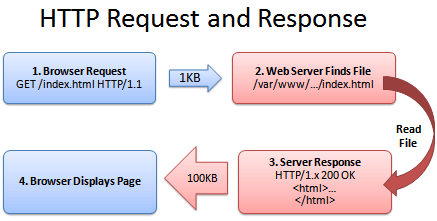

Η παραπάνω εικόνα είναι από εδώ: https://lse-my472.github.io/week03/MY472-week03-HTML-CSS.pdf

Το περιεχόμενο της αρχικής σελίδας του bbc εμφανίζεται με τρόπο που είναι εύκολα αντιληπτός και κατανοητός από τον άνθρωπο: (σχεδόν) κάθε άρθρο εμφανίζεται σαν ένα ορθογώνιο, το οποίο περιέχει μια φωτογραφία, τον τίτλο, μια σύντομη περίληψη, πριν πόση ώρα αναρτήθηκε και σε ποια κατηγορία ανήκει (π.χ. Europe, Ηealth κλπ.). Επίσης, ο τίτλος (και η φωτογραφία όταν υπάρχει) είναι υπερσύνδεσμοι (links) που οδηγούν στην αντίστοιχη ιστοσελίδα που περιέχεται ολόκληρο το άρθρο και η κατηγορία (όταν υπάρχει) είναι επίσης υπερσύνδεσμος που οδηγεί στη σελίδα της αντίστοιχης κατηγορίας.

Αυτός είναι ο τρόπος που ο browser εμφανίζει το περιεχόμενο της ιστοσελίδας για να διαβαστεί από ανθρώπους. Η ιστοσελίδα όμως καθεαυτή, πριν μορφοποιηθεί από τον browser, υπάρχει σαν html κώδικας που καταλαβαίνουν οι μηχανές. Αυτόν τον κώδικα θα πάρουμε στην python και από αυτόν τον κώδικα θα αντλήσουμε τα δεδομένα που μας ενδιαφέρουν. 

Ακριβώς γι'αυτό και **επειδή η δομή του περιεχομένου των ιστοσελίδων διαφοροποιείται από site σε site, κάθε φορά που θέλουμε να κάνουμε scraping από μια ιστοσελίδα, πρέπει να επισκοπούμε τον html κώδικά της για να καταλάβουμε ποια html tags και css classes αντιστοιχούν στην πληροφορία που μας ενδιαφέρει να συλλέξουμε**.

Μπορούμε να δούμε τον html κώδικα μιας ιστοσελίδας στον browser κάνοντας δεξί κλικ σε οποιοδήποτε σημείο της σελίδας και επιλέγοντας Inspect. Για να δούμε τον κώδικα που αντιστοιχεί σε συγκεκριμένο αντικείμενο που μας ενδιαφέρει (π.χ. στον τίτλο ενός από τα άρθρα) κάνουμε δεξί κλικ πάνω στο συγκεκριμένο αντικείμενο και επιλέγουμε Inspect.


---
Περισσότερα για την κατανόηση των βασικών html στοιχείων για web scraping, μπορείτε να διαβάσετε σε αυτό το άρθρο: https://betterprogramming.pub/understanding-html-basics-for-web-scraping-ae351ee0b3f9

####Πώς θα βρούμε τον κώδικα που αντιστοιχεί στον Τίτλο, το URL και την Περίληψη κάθε άρθρου; Πώς είναι δομημένη η αρχική σελίδα του bbc.com;

Κάνοντας δεξί κλικ και Inspect στον τίτλο ενός άρθρου στην αρχική σελίδα, φωτίζεται η γραμμή του αντίστοιχου κώδικα.

Στο `<a>` tag υπάρχει το `href` που φιλοξενεί το url του άρθρου και το `<h3>` tag με τον Τίτλο του άρθρου.

Παρακάτω, στο `<p>` tag υπάρχει η περίληψη του άρθρου (το summary).

Όλα αυτά και πολλά περισσότερα (όπως η εικόνα, η ημερομηνία και η κατηγορία) του συγκεκριμένου άρθρου, αλλά και κάθε άρθρου εντάσσονται σε ένα `<div>` με ένα `class="gs-c-promo"` (το πρώτο από αρκετά άλλα classes).

*Μπορείτε να δείτε ένα σύντομο animated gif για το συγκεκριμένο Inspect εδώ:*
https://drive.google.com/file/d/1sHTyBhzDE-HjlJt8g3P57KYeR126u-rn/view?usp=sharing

Αφού κατανοήσουμε το πώς είναι δομημένη η html της σελίδας που μας ενδιαφέρει και πού κρύβονται τα δεδομένα που θέλουμε, μπορούμε να προχωρήσουμε στη συλλογή τους με την python. 

###2. Φέρνουμε (κατεβάζουμε) το σύνολο των περιεχομένων της ιστοσελίδας στον υπολογιστή μας

Ας δούμε το μέρος του κώδικα που κατεβάζει όλη την ιστοσελίδα στον υπολογιστή μας και την ετοιμάζει έτσι ώστε να μπορούμε να καλούμε τα html tags μας ενδιαφέρουν.

In [ ]:
# Εισαγωγή των απαραίτητων βιβλιοθηκών
import requests
from bs4 import BeautifulSoup

# Κάνουμε αίτημα (requests) στον server, για να μας φέρει (get) την ιστοσελίδα που μας ενδιαφέρει (την αρχική σελίδα του bbc, η οποία περιέχει μια σειρά από άρθρα προς ανάγνωση)
# και αποθηκεύουμε την απόκριση (response) του server σε μια μεταβλητή που ονομάζουμε response (μπορούμε να την ονομάσουμε και σκέτο r ή όπως αλλιώς θέλουμε)
response = requests.get('http://www.bbc.co.uk/news') 
# με τη χρήση της BeautifulSoup, παίρνουμε από την απόκριση του server (response) το κείμενο (.text) της ιστοσελίδας,
# το ετοιμάζουμε για να μπορούμε μετά να καλούμε html tags (html.parser) και σώζουμε το αποτέλεσμα σε μια μεταβλητή με όνομα soup
soup = BeautifulSoup(response.text, 'html.parser')  

In [ ]:
# Αυτή είναι η απάντηση του server μετά το request (το source της σελίδας)
response.content

b'<!DOCTYPE html>\n<html lang="en-GB" class="b-pw-1280 b-reith-sans-font no-touch" id="responsive-news">\n<head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <meta name="google-site-verification" content="Tk6bx1127nACXoqt94L4-D-Of1fdr5gxrZ7u2Vtj9YI">\n    <link href="//static.bbc.co.uk" rel="preconnect" crossorigin>\n    <link href="//m.files.bbci.co.uk" rel="preconnect" crossorigin>\n    <link href="//nav.files.bbci.co.uk" rel="preconnect" crossorigin>\n    <link href="//ichef.bbci.co.uk" rel="preconnect" crossorigin>\n    <link rel="dns-prefetch" href="//mybbc.files.bbci.co.uk">\n    <link rel="dns-prefetch" href="//ssl.bbc.co.uk/">\n    <link rel="dns-prefetch" href="//sa.bbc.co.uk/">\n    <link rel="dns-prefetch" href="//ichef.bbci.co.uk">\n\n\n    <link rel="preload" as="style" href="//m.files.bbci.co.uk/modules/bbc-morph-news-page-styl

In [ ]:
# Αυτή είναι η html σελίδα όπως έγινε μετά το html parsing της BeautifulSoup 
print(soup.prettify())

<!DOCTYPE html>
<html class="b-pw-1280 b-reith-sans-font no-touch" id="responsive-news" lang="en-GB">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, user-scalable=1" name="viewport"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="Tk6bx1127nACXoqt94L4-D-Of1fdr5gxrZ7u2Vtj9YI" name="google-site-verification"/>
  <link crossorigin="" href="//static.bbc.co.uk" rel="preconnect"/>
  <link crossorigin="" href="//m.files.bbci.co.uk" rel="preconnect"/>
  <link crossorigin="" href="//nav.files.bbci.co.uk" rel="preconnect"/>
  <link crossorigin="" href="//ichef.bbci.co.uk" rel="preconnect"/>
  <link href="//mybbc.files.bbci.co.uk" rel="dns-prefetch"/>
  <link href="//ssl.bbc.co.uk/" rel="dns-prefetch"/>
  <link href="//sa.bbc.co.uk/" rel="dns-prefetch"/>
  <link href="//ichef.bbci.co.uk" rel="dns-prefetch"/>
  <link as="style" href="//m.files.bbci.co.uk/modules/bbc-morph-news-page-styles/2.4.25/enhanced.css" rel="preload

Μετά το html parsing μπορούμε να αναζητήσουμε τα html tags που θέλουμε, δηλαδή τα divs που έχουν class το gs-c-promo

###3. Επιλέγουμε και αντλούμε από το σύνολο των περιεχομένων της ιστοσελίδας μόνο εκείνα τα στοιχεία που μας ενδιαφέρουν

In [ ]:
# αναζητούμε στην html (στο soup) όλα τα divs (find_all) που έχουν το class 'gs-c-promo' και τα αποθηκεύουμε σαν stories
stories = soup.find_all('div', { 'class': 'gs-c-promo' }) 

In [ ]:
# το soup.find_all(), παραπάνω, επιστρέφει μια λίστα με όλα τα divs που έχουν class="gs-c-promo",
# δηλαδή το stories είναι μια λίστα με όλα τα divs που έχουν class="gs-c-promo"
stories

[<div class="gs-c-promo nw-c-promo gs-o-faux-block-link gs-u-pb gs-u-pb+@m nw-p-default gs-o-primary-promo gs-u-display-inline-block gs-u-clearfix gs-u-float-right@m gs-u-ml0 gs-c-promo--flex" data-entityid="container-top-stories#1"><div class="gs-c-promo-body gs-u-display-none gs-u-display-inline-block@m gs-u-mt@xs gs-u-mt0@m gel-1/3@m"><div><a class="gs-c-promo-heading gs-o-faux-block-link__overlay-link gel-paragon-bold nw-o-link-split__anchor" href="/news/live/world-europe-61404062"><span class="gs-o-bullet gs-c-live-pulse gs-c-live-pulse--news nw-c-live-pulse gs-u-mr"><span aria-hidden="true" class="gs-o-bullet__icon gs-c-live-pulse__icon gel-icon"></span><span class="gs-u-vh">Live</span><span aria-hidden="true" class="gs-o-bullet__text gs-c-live-pulse__text">Live</span></span><h3 class="gs-c-promo-heading__title gel-paragon-bold nw-o-link-split__text">Putin humiliating himself on the world stage - UK</h3></a><p class="gs-c-promo-summary gel-long-primer gs-u-mt nw-c-promo-summary">

In [ ]:
# Εφόσον το stories είναι μια λίστα, μπορούμε να πλοηγηθούμε στα αντικείμενα που περιέχει
stories[0] # το 0 είναι το πρώτο αντικείμενο σε μια λίστα (δηλαδή, στην περίπτωσή μας, το πρώτο άρθρο/story)

<div class="gs-c-promo nw-c-promo gs-o-faux-block-link gs-u-pb gs-u-pb+@m nw-p-default gs-o-primary-promo gs-u-display-inline-block gs-u-clearfix gs-u-float-right@m gs-u-ml0 gs-c-promo--flex" data-entityid="container-top-stories#1"><div class="gs-c-promo-body gs-u-display-none gs-u-display-inline-block@m gs-u-mt@xs gs-u-mt0@m gel-1/3@m"><div><a class="gs-c-promo-heading gs-o-faux-block-link__overlay-link gel-paragon-bold nw-o-link-split__anchor" href="/news/live/world-europe-61404062"><span class="gs-o-bullet gs-c-live-pulse gs-c-live-pulse--news nw-c-live-pulse gs-u-mr"><span aria-hidden="true" class="gs-o-bullet__icon gs-c-live-pulse__icon gel-icon"></span><span class="gs-u-vh">Live</span><span aria-hidden="true" class="gs-o-bullet__text gs-c-live-pulse__text">Live</span></span><h3 class="gs-c-promo-heading__title gel-paragon-bold nw-o-link-split__text">Putin humiliating himself on the world stage - UK</h3></a><p class="gs-c-promo-summary gel-long-primer gs-u-mt nw-c-promo-summary">F

In [ ]:
# Σε κάθε story (δηλαδή κάθε item της λίστας stories) μπορούμε να αναζητήσουμε τα tags που θέλουμε:

# Θέλουμε το <a> (που έχει το url του άρθρου στο href)
stories[0].find('a')

<a class="gs-c-promo-heading gs-o-faux-block-link__overlay-link gel-paragon-bold nw-o-link-split__anchor" href="/news/live/world-europe-61404062"><span class="gs-o-bullet gs-c-live-pulse gs-c-live-pulse--news nw-c-live-pulse gs-u-mr"><span aria-hidden="true" class="gs-o-bullet__icon gs-c-live-pulse__icon gel-icon"></span><span class="gs-u-vh">Live</span><span aria-hidden="true" class="gs-o-bullet__text gs-c-live-pulse__text">Live</span></span><h3 class="gs-c-promo-heading__title gel-paragon-bold nw-o-link-split__text">Putin humiliating himself on the world stage - UK</h3></a>

In [ ]:
# Όμως δεν θέλουμε όλο το <a>, αλλά μόνο το href
stories[0].find('a')['href']

'/news/live/world-europe-61404062'

In [ ]:
# To url είναι σχετικό, δηλαδή λείπει το κύριο μέρος του url της ιστοσελίδας που είναι https://bbc.com
# Άρα, θα πρέπει να το προσθέτουμε
"https://bbc.com" + stories[0].find('a')['href']

'https://bbc.com/news/live/world-europe-61404062'

In [ ]:
# Θέλουμε το <h3> (τον Τίτλο του άρθρου)
stories[0].find('h3') 

<h3 class="gs-c-promo-heading__title gel-paragon-bold nw-o-link-split__text">Putin humiliating himself on the world stage - UK</h3>

In [ ]:
# Κι εδώ επίσης, δεν θέλουμε όλο το h3, αλλά μόνο το text του
stories[0].find('h3').text

'Putin humiliating himself on the world stage - UK'

In [ ]:
# Τέλος, Θέλουμε και το <p> (το summary), αλλά επίσης μόνο το text
stories[0].find('p').text

'Foreign Secretary Liz Truss urges allies to further sanction Russia over its invasion of Ukraine.'

Επομένως, φτιάχνοντας μια λούπα, μπορούμε να πηγαίνουμε ένα-ένα, σε όλα τα άρθρα (σε κάθε story) της λίστας stories, να βρίσκουμε τον τίτλο, το url και το summary και να τα αποθηκεύουμε σε αντίστοιχες μεταβλητές.

Επειδή όμως, κάποιο άρθρο μπορεί να μην έχει κάποιο απ'αυτά (τίτλο, url ή summary), θα βάλουμε και ένα if statement πριν τα αποθηκεύσουμε (αλλιώς θα χτυπήσει ο κώδικας καθώς θα εκτελείται).

In [ ]:
stories_list = [] # δημιουργούμε μια κενή λίστα ([]) στην οποία θα σώζουμε τα δεδομένα που θα μαζεύουμε για την κάθε ιστορία (το κάθε άρθρο)

# Δημιουργούμε μια for loop, δηλαδή μια σειρά εντολών που επαναλαμβάνεται για κάθε 
for story in stories: # για κάθε άρθρο που υπάρχει στη λίστα stories
    story_dict = {} # φτιάξε ένα λεξικό χωρίς τίποτα
    h3 = story.find('h3') # βρες και αποθήκευσε στη μεταβλητή headline, το <h3> tag του άρθρου
    if h3: # Αν υπάρχει <h3>
      story_dict['headline'] = h3.text # αποθήκευσε στo λεξικό στο λήμμα headline, το text του <h3> tag (τίτλος) του άρθρου
    a = story.find('a') # βρες και αποθήκευσε στη μεταβλητή a, το <a> tag του άρθρου
    if a: # Αν υπάρχει <a>
      story_dict['url'] = "https://bbc.com" + a['href'] # αποθήκευσε στo λεξικό στο λήμμα url, το text του <a> tag (url) του άρθρου, προσθέτοντας στην αρχή του το κεντρικό url της σελίδας
    p = story.find('p') # βρες και αποθήκευσε στη μεταβλητή p, το text του <p> tag (summary) του άρθρου
    if p: # αν υπάρχει <p>
      story_dict['summary'] = p.text # αποθήκευσε στο λεξικό στο λήμμα summary το text του <p> tag (summary) του άρθρου
    # Αφού μαζέψαμε τα δεδομένα που μας ενδιαφέρουν για το άρθρο στο λεξικό, 
    # προσθέτουμε το λεξικό στη λίστα που δημιουργήσαμε στην αρχή (stories_list)
    # για να αποθηκεύουμε τα δεδομένα όλων των ιστοριών-άρθρων 
    stories_list.append(story_dict)

print(stories_list) # Τυπώνουμε τη λίστα όλων των ιστοριών (στην οποία αποθηκεύσαμε όλα τα λεξικά: ένα για κάθε ιστορία-άρθρο)

[{'headline': 'Putin humiliating himself on the world stage - UK', 'url': 'https://bbc.com/news/live/world-europe-61404062', 'summary': 'Foreign Secretary Liz Truss urges allies to further sanction Russia over its invasion of Ukraine.'}, {'headline': 'CCTV shows Russian soldiers killing Ukrainian civilians', 'url': 'https://bbc.com/news/world-europe-61425025', 'summary': 'The incident, captured on video seen by the BBC, is being investigated as a suspected war crime.'}, {'headline': 'North Korea announces first death from Covid-19', 'url': 'https://bbc.com/news/world-asia-61432084', 'summary': 'A day after confirming its first cases, state media reports thousands are suffering fever symptoms.'}, {'headline': 'California mansions burn as wildfires spread', 'url': 'https://bbc.com/news/world-us-canada-61430573', 'summary': 'Across North America, wildfire crews are gearing up for a particularly difficult season.'}, {'headline': 'US paratrooper killed in Alaska bear attack', 'url': 'https:

###4. Κατασκευάζουμε έναν οργανωμένο πίνακα (ένα dataframe) με τα στοιχεία που μας ενδιαφέρουν και τον αποθηκεύουμε (σαν csv) για μελλοντική επεξεργασία.

In [ ]:
# Εισαγωγή της βιβλιοθήκης των pandas
import pandas as pd

# Κατασκευή ενός dataframe από τη λίστα όλων των ιστοριών
df = pd.DataFrame(stories_list)
df # επισκόπηση του dataframe

,headline,url,summary
0,Putin humiliating himself on the world stage - UK,https://bbc.com/news/live/world-europe-61404062,Foreign Secretary Liz Truss urges allies to fu...
1,CCTV shows Russian soldiers killing Ukrainian ...,https://bbc.com/news/world-europe-61425025,"The incident, captured on video seen by the BB..."
2,North Korea announces first death from Covid-19,https://bbc.com/news/world-asia-61432084,"A day after confirming its first cases, state ..."
3,California mansions burn as wildfires spread,https://bbc.com/news/world-us-canada-61430573,"Across North America, wildfire crews are geari..."
4,US paratrooper killed in Alaska bear attack,https://bbc.com/news/world-us-canada-61432239,"Staff Sgt Seth Michael Plant, a veteran of the..."
5,India couple sue son for not giving them a gra...,https://bbc.com/news/world-asia-india-61424869,The Indian parents say they used up their savi...
6,First picture of monster black hole in our galaxy,https://bbc.com/news/science-environment-61412463,Astronomers reveal the first ever image of the...
7,Ireland fail to make Eurovision Song Contest f...,https://bbc.com/news/entertainment-arts-61428830,"Ireland go home after Thursday's semi-final, d..."
8,Twitter executives ousted ahead of Musk takeover,https://bbc.com/news/business-61432742,One of the senior executives was on parental l...
9,Russia threatens retaliation for Finland Nato ...,https://bbc.com/news/world-europe-61420185,Finland's leaders say they want the country to...


In [ ]:
# Μετατροπή του dataframe σε CSV και αποθήκευσή του
df.to_csv("bbc.csv", index=False) # Με το index=False, αποφεύγουμε την εγγραφή του index στο csv.

**Σημείωση**: Εάν τρέχουμε τον κώδικα τοπικά στον υπολογιστή μας, το csv που δημιουργούμε θα σωθεί στον ίδιο φάκελο που υπάρχει το αρχείο με τον κώδικα της python.

Εάν όμως, δουλεύουμε στο colab, το πιθανότερο είναι ότι θα θέλουμε να σώσουμε το csv στο drive μας. Γι' αυτό, θα πρέπει πριν το σώσουμε να συνδεθούμε στο drive και να δηλώσουμε το path που θα σωθεί το csv. 

In [ ]:
from google.colab import drive # εισαγωγή της βιβλιοθήκης drive
drive.mount('gdrive') # mount ενός folder στο drive (μένει ως έχει)
ls 'gdrive/MyDrive/' # επισκόπηση των περιεχομένων του MyDrive (μένει ως έχει)
df.to_csv("/gdrive/MyDrive/SomeFolderName/bbc.csv", index=False) # εγγραφή του csv στον φάκελο που θέλουμε στο drive μας (αντικαθιστούμε το SomeFolderName με το όνομα του φακέλου που θέλουμε να σωθεί το csv)

####Ολόκληρος ο κώδικας με επεξηγηματικό σχολιασμό

In [ ]:
# Εισαγωγή των απαραίτητων βιβλιοθηκών
import requests
from bs4 import BeautifulSoup

# Κάνουμε αίτημα (requests) στον server, για να μας φέρει (get) την ιστοσελίδα που μας ενδιαφέρει (την αρχική σελίδα του bbc, η οποία περιέχει μια σειρά από άρθρα προς ανάγνωση)
# και αποθηκεύουμε την απόκριση (response) του server σε μια μεταβλητή που ονομάζουμε response (μπορούμε να την ονομάσουμε και σκέτο r ή όπως αλλιώς θέλουμε)
response = requests.get('http://www.bbc.co.uk/news') 
# Με τη χρήση της BeautifulSoup, παίρνουμε από την απόκριση του server (response) το κείμενο (.text) της ιστοσελίδας,
# το ετοιμάζουμε για να μπορούμε μετά να καλούμε html tags (με το html.parser) και σώζουμε το αποτέλεσμα σε μια μεταβλητή με όνομα soup (επίσης μπορούμε να της δώσουμε ότι όνομα θέλουμε)
soup = BeautifulSoup(response.text, 'html.parser')  

# Αναζητούμε στην html (στο soup) όλα τα divs (find_all) που έχουν το class 'gs-c-promo' και τα αποθηκεύουμε σαν stories
stories = soup.find_all('div', { 'class': 'gs-c-promo' }) 

# Δημιουργούμε μια κενή λίστα ([]) στην οποία θα σώζουμε τα δεδομένα που θα μαζεύουμε για την κάθε ιστορία (το κάθε άρθρο)
stories_list = [] 

# Δημιουργούμε μια for loop, δηλαδή μια σειρά εντολών που επαναλαμβάνεται για κάθε ιστορία-άρθρο
for story in stories: # για κάθε άρθρο που υπάρχει στη λίστα stories
    story_dict = {} # φτιάξε ένα λεξικό χωρίς τίποτα
    h3 = story.find('h3') # βρες και αποθήκευσε στη μεταβλητή headline, το <h3> tag του άρθρου
    if h3: # Αν υπάρχει <h3>
      story_dict['headline'] = h3.text # αποθήκευσε στo λεξικό στο λήμμα headline, το text του <h3> tag (τίτλος) του άρθρου
    a = story.find('a') # βρες και αποθήκευσε στη μεταβλητή a, το <a> tag του άρθρου
    if a: # Αν υπάρχει <a>
      story_dict['url'] = "https://bbc.com" + a['href'] # αποθήκευσε στo λεξικό στο λήμμα url, το text του <a> tag (url) του άρθρου, προσθέτοντας στην αρχή του το κεντρικό url της σελίδας
    p = story.find('p') # βρες και αποθήκευσε στη μεταβλητή p, το text του <p> tag (summary) του άρθρου
    if p: # αν υπάρχει <p>
      story_dict['summary'] = p.text # αποθήκευσε στο λεξικό στο λήμμα summary το text του <p> tag (summary) του άρθρου
    # Αφού μαζέψαμε τα δεδομένα που μας ενδιαφέρουν για το άρθρο στο λεξικό, 
    # προσθέτουμε το λεξικό στη λίστα που δημιουργήσαμε στην αρχή (stories_list) για να αποθηκεύουμε τα δεδομένα όλων των ιστοριών-άρθρων 
    stories_list.append(story_dict)

print(stories_list) # Τυπώνουμε τη λίστα όλων των ιστοριών (στην οποία αποθηκεύσαμε όλα τα λεξικά: ένα για κάθε ιστορία-άρθρο)

# Εισαγωγή της βιβλιοθήκης των pandas
import pandas as pd

# Κατασκευή ενός dataframe από τη λίστα όλων των ιστοριών
df = pd.DataFrame(stories_list)
df
# Μετατροπή του dataframe σε CSV και αποθήκευσή του
#df.to_csv("full_path/bbc.csv", index=False) # Με το index=False, αποφεύγουμε την εγγραφή του index στο csv κι έτσι έχουμε ένα καλά δομημένο και εύκολα διαχειρίσιμο csv.

[{'headline': 'Putin humiliating himself on the world stage - UK', 'url': 'https://bbc.com/news/live/world-europe-61404062', 'summary': 'Foreign Secretary Liz Truss urges allies to further sanction Russia over its invasion of Ukraine.'}, {'headline': 'CCTV shows Russian soldiers killing Ukrainian civilians', 'url': 'https://bbc.com/news/world-europe-61425025', 'summary': 'The incident, captured on video seen by the BBC, is being investigated as a suspected war crime.'}, {'headline': 'North Korea announces first death from Covid-19', 'url': 'https://bbc.com/news/world-asia-61432084', 'summary': 'A day after confirming its first cases, state media reports thousands are suffering fever symptoms.'}, {'headline': 'California mansions burn as wildfires spread', 'url': 'https://bbc.com/news/world-us-canada-61430573', 'summary': 'Across North America, wildfire crews are gearing up for a particularly difficult season.'}, {'headline': 'US paratrooper killed in Alaska bear attack', 'url': 'https:



---



####**Άσκηση**

Συλλέξτε τους Τίτλους, τα urls, τα summaries και την ημερομηνία δημοσίευσης (datetime) των άρθρων που βρίσκονται στον ιστότοπο του BBC, στην κατηγορία Climate. 

**Hint** (για την ημερομηνία): δείτε με Inspect που βρίσκεται (σε ποιο tag) η ημερομηνία και με πόσες μορφές καταγράφεται. Εμείς θέλουμε το datetime, το οποίο είναι attribute του time. (https://stackoverflow.com/questions/54861335/scraping-based-on-date-with-beautifulsoup)

**Λύση**

In [49]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Κατέβασμα της σελίδας Climate του bbc
response = requests.get('https://www.bbc.com/news/science-environment-56837908') 
soup = BeautifulSoup(response.text, 'html.parser') 

# Μάζεμα και αποθήκευση όλων των δεδομένων που μας ενδιαφέρουν (τίτλος, url, περίληψη, ημερομηνία, κατηγορία) για όλα τα άρθρα
climate_stories_list = [] # δημιουργία κενής λίστας για την αποθήκευση όλων των δεδομένων όλων των ιστοριών

climate_stories = soup.find_all('div', { 'class': 'gs-c-promo' })
for story in climate_stories: 
  story_dict = {} # δημιουργία κενού λεξικού για την αποθήκευση των δεδομένων κάθε ιστορίας-άρθρου
  h3 = story.find('h3') 
  if h3: 
    story_dict['headline'] = h3.text # τίτλος
  a = story.find('a') 
  if a: 
    story_dict['url'] = "https://bbc.com" + a['href'] # url
  p = story.find('p') 
  if p: 
    story_dict['summary'] = p.text # περίληψη
  time = story.find('time', {'class':'date'})
  if time:
    story_dict['datetime'] = time['datetime'] # ημερομηνία
  category = story.find('a', {'class': 'gs-c-section-link'})
  if category:
    story_dict['category'] = category.text # κατηγορία
  climate_stories_list.append(story_dict)

print(climate_stories_list)

# Δημιουργία του dataframe
climate_df = pd.DataFrame(climate_stories_list)
climate_df

[{'headline': "Why Australia's election is big for the planet", 'url': 'https://bbc.com/news/world-australia-61317296', 'summary': "The outcome could be very significant for the climate, says one of the country's top scientists.", 'datetime': '2022-05-10T22:58:43.000Z', 'category': 'Australia'}, {'headline': "Why Australia's election is big for the planet", 'url': 'https://bbc.com/news/world-australia-61317296', 'summary': "The outcome could be very significant for the climate, says one of the country's top scientists.", 'datetime': '2022-05-10T22:58:43.000Z', 'category': 'Australia'}, {'headline': "'Fifty-fifty chance' global warming tops 1.5C soon", 'url': 'https://bbc.com/news/science-environment-61383391', 'summary': "Scientists say there's now a strong chance that the world will warm by more than 1.5C by 2026.", 'datetime': '2022-05-09T23:38:30.000Z', 'category': 'Science & Environment'}, {'headline': 'Airlines miss all but one climate target - report', 'url': 'https://bbc.com/new

,headline,url,summary,datetime,category
0,Why Australia's election is big for the planet,https://bbc.com/news/world-australia-61317296,The outcome could be very significant for the ...,2022-05-10T22:58:43.000Z,Australia
1,Why Australia's election is big for the planet,https://bbc.com/news/world-australia-61317296,The outcome could be very significant for the ...,2022-05-10T22:58:43.000Z,Australia
2,'Fifty-fifty chance' global warming tops 1.5C ...,https://bbc.com/news/science-environment-61383391,Scientists say there's now a strong chance tha...,2022-05-09T23:38:30.000Z,Science & Environment
3,Airlines miss all but one climate target - report,https://bbc.com/news/science-environment-61384377,Campaigners say the aviation industry cannot b...,2022-05-09T23:39:19.000Z,Science & Environment
4,Putin has not wrecked Glasgow Climate Pact - K...,https://bbc.com/news/uk-scotland-61383293,US climate envoy John Kerry says the war in Uk...,2022-05-10T17:50:11.000Z,Scotland
5,Climate focus could shape Australia's election,https://bbc.com/news/world-australia-61374914,Climate-focused independents - a group of main...,2022-05-09T15:56:14.000Z,Australia
6,Coal shortage sparks India's power woes,https://bbc.com/news/world-asia-india-61330302,Analysts are worried about India's climate cha...,2022-05-08T23:39:32.000Z,India
7,Are soaring temperatures linked to climate cha...,https://bbc.com/news/science-environment-58073295,"Heatwaves, wildfires, floods and droughts high...",2022-05-12T14:47:17.000Z,Science & Environment
8,Why Australia's election is big for the planet,https://bbc.com/news/world-australia-61317296,The outcome could be very significant for the ...,2022-05-10T22:58:43.000Z,Australia
9,'Fifty-fifty chance' global warming tops 1.5C ...,https://bbc.com/news/science-environment-61383391,Scientists say there's now a strong chance tha...,2022-05-09T23:38:30.000Z,Science & Environment


####**Challenge**

Αφού όλες οι σελίδες των κατηγοριών στο bbc έχουν ίδια δομή, πώς θα μπορούσαμε να συμπληρώσουμε τον κώδικα, ώστε να τον τρέξουμε μια φορά και να πάρουμε όλους τους τίτλους, τα urls, τις περιλήψεις και τις ημερομηνίες δημοσίευσης, από όλα τα άρθρα όλων των κατηγοριών;

**Hint**: Τι θα λέγατε για μια ακόμα for loop που θα κάνει request μία-μία όλες τις ιστοσελίδες των κατηγοριών (με ενδιάμεσο sleep φυσικά); (https://stackabuse.com/guide-to-parsing-html-with-beautifulsoup-in-python/)

**Λύση**

In [ ]:
import requests
from bs4 import BeautifulSoup

response = requests.get('http://www.bbc.co.uk/news') 
soup = BeautifulSoup(response.text, 'html.parser') 

In [ ]:
# Μάζεμα όλων των urls όλων των κατηγοριών άρθρων,
# δηλαδή των href των <a> των menu-items του κύριου μενού,
# το οποίο είναι στο <nav> με class='nw-c-nav_wide)
cats = soup.find('nav', {'class': 'nw-c-nav__wide'}).find_all('a', {'class': 'nw-o-link'})
cats_urls = []
for cat in cats:
  cat_url = "https://bbc.com" + cat['href']
  cats_urls.append(cat_url)
cats_urls

['https://bbc.com/news',
 'https://bbc.com/news/world-60525350',
 'https://bbc.com/news/coronavirus',
 'https://bbc.com/news/science-environment-56837908',
 'https://bbc.com/news/av/10462520',
 'https://bbc.com/news/world',
 'https://bbc.com/news/world/us_and_canada',
 'https://bbc.com/news/uk',
 'https://bbc.com/news/business',
 'https://bbc.com/news/technology',
 'https://bbc.com/news/science_and_environment',
 'https://bbc.com/news/stories',
 'https://bbc.com/news/entertainment_and_arts',
 'https://bbc.com/news/health',
 'https://bbc.com/news/in_pictures',
 'https://bbc.com/news/reality_check',
 'https://bbc.com/news/world_radio_and_tv',
 'https://bbc.com/news/newsbeat',
 'https://bbc.com/news/the_reporters']

In [ ]:
import time

# Δημιουργούμε μια for loop που θα κάνει request (ένα τη φορά με time.sleep(3) από όλα τα cats_urls
# και θα κάνει το κάθε response ένα dictionaryappend το κάθε response σε μια λίστα
soups = []
for cat_url in cats_urls:
  html_text = requests.get(cat_url).text
  soup = BeautifulSoup(html_text, "html.parser")
  print(f"Now Scraping - {cat_url}")
  time.sleep(3)
  soups.append(soup)

Now Scraping - https://bbc.com/news
Now Scraping - https://bbc.com/news/world-60525350
Now Scraping - https://bbc.com/news/coronavirus
Now Scraping - https://bbc.com/news/science-environment-56837908
Now Scraping - https://bbc.com/news/av/10462520
Now Scraping - https://bbc.com/news/world
Now Scraping - https://bbc.com/news/world/us_and_canada
Now Scraping - https://bbc.com/news/uk
Now Scraping - https://bbc.com/news/business
Now Scraping - https://bbc.com/news/technology
Now Scraping - https://bbc.com/news/science_and_environment
Now Scraping - https://bbc.com/news/stories
Now Scraping - https://bbc.com/news/entertainment_and_arts
Now Scraping - https://bbc.com/news/health
Now Scraping - https://bbc.com/news/in_pictures
Now Scraping - https://bbc.com/news/reality_check
Now Scraping - https://bbc.com/news/world_radio_and_tv
Now Scraping - https://bbc.com/news/newsbeat
Now Scraping - https://bbc.com/news/the_reporters


In [ ]:
all_stories_list = []
for soup in soups:
  all_stories = soup.find_all('div', { 'class': 'gs-c-promo' })
  for story in all_stories: 
    story_dict = {} 
    h3 = story.find('h3') 
    if h3: 
      story_dict['headline'] = h3.text 
    a = story.find('a') 
    if a: 
      story_dict['url'] = "https://bbc.com" + a['href']
    p = story.find('p') 
    if p: 
      story_dict['summary'] = p.text  
    time = story.find('time', {'class':'date'})
    if time:
      story_dict['datetime'] = time['datetime']
    category = story.find('a', {'class': 'gs-c-section-link'})
    if category:
      story_dict['category'] = category.text
    all_stories_list.append(story_dict)

print(all_stories_list)
  

[{'headline': 'Russian battalion wiped out in failed river crossing - UK', 'url': 'https://bbc.com/news/live/world-europe-61404062', 'summary': 'Apparently severe Russian losses in the Luhansk region suggest commanders are under pressure to take risks, the UK claims.'}, {'headline': 'CCTV shows Russian soldiers killing Ukrainian civilians', 'url': 'https://bbc.com/news/world-europe-61425025', 'summary': 'The incident, captured on video seen by the BBC, is being investigated as a suspected war crime.'}, {'headline': 'Elon Musk puts $44bn Twitter deal on hold', 'url': 'https://bbc.com/news/business-61433724', 'summary': "The billionaire wants more data on fake accounts, prompting speculation over the deal's future."}, {'headline': "Worse still to come, Sri Lanka's new PM warns", 'url': 'https://bbc.com/news/world-asia-61434304', 'summary': "Sri Lanka's new PM tells the BBC the country's dire economic crisis will get worse before it gets better."}, {'headline': 'California mansions burn a

In [ ]:
all_bbc_df = pd.DataFrame(all_stories_list)
all_bbc_df

,headline,url,summary
0,Russian battalion wiped out in failed river cr...,https://bbc.com/news/live/world-europe-61404062,Apparently severe Russian losses in the Luhans...
1,CCTV shows Russian soldiers killing Ukrainian ...,https://bbc.com/news/world-europe-61425025,"The incident, captured on video seen by the BB..."
2,Elon Musk puts $44bn Twitter deal on hold,https://bbc.com/news/business-61433724,The billionaire wants more data on fake accoun...
3,"Worse still to come, Sri Lanka's new PM warns",https://bbc.com/news/world-asia-61434304,Sri Lanka's new PM tells the BBC the country's...
4,California mansions burn as wildfires spread,https://bbc.com/news/world-us-canada-61430573,"Across North America, wildfire crews are geari..."
...,...,...,...
684,A 20th-Century city à la ancient Athens,https://bbc.comhttps://www.bbc.com/travel/arti...,NaN
685,People who 'danced themselves to death',https://bbc.comhttps://www.bbc.com/culture/art...,NaN
686,The Earth 'blobs' no one understands,https://bbc.comhttps://www.bbc.com/future/arti...,NaN
687,The toxic 'cut-throat' work problem,https://bbc.comhttps://www.bbc.com/worklife/ar...,NaN


**Ολόκληρος ο κώδικας**

In [46]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Κατέβασμα της αρχικής σελίδας του bbc
response = requests.get('http://www.bbc.co.uk/news') 
soup = BeautifulSoup(response.text, 'html.parser') 

# Μάζεμα όλων των urls των σελίδων όλων των κατηγοριών
cats = soup.find('nav', {'class': 'nw-c-nav__wide'}).find_all('a', {'class': 'nw-o-link'})
cats_urls = [] # δημιουργία κενής λίστας για την αποθήκευση όλων των urls των σελίδων των κατηγοριών
for cat in cats:
  cat_url = "https://bbc.com" + cat['href']
  cats_urls.append(cat_url)
cats_urls

# Μάζεμα όλων των html όλων των σελίδων
soups = [] # δημιουργία κενής λίστας για την αποθήκευση όλων των html των σελίδων των κατηγοριών
for cat_url in cats_urls:
  html_text = requests.get(cat_url).text
  soup = BeautifulSoup(html_text, "html.parser")
  print(f"Now Scraping - {cat_url}")
  time.sleep(3)
  soups.append(soup)

# Μάζεμα και αποθήκευση όλων των δεδομένων που μας ενδιαφέρουν (τίτλος, url, περίληψη, ημερομηνία, κατηγορία) για όλα τα άρθρα
all_stories_list = [] # δημιουργία κενής λίστας για την αποθήκευση όλων των δεδομένων όλων των ιστοριών
for soup in soups:
  all_stories = soup.find_all('div', { 'class': 'gs-c-promo' })
  for story in all_stories: 
    story_dict = {} # δημιουργία κενού λεξικού για την αποθήκευση των δεδομένων κάθε ιστορίας-άρθρου
    h3 = story.find('h3') 
    if h3: 
      story_dict['headline'] = h3.text # τίτλος
    a = story.find('a') 
    if a: 
      story_dict['url'] = "https://bbc.com" + a['href'] # url
    p = story.find('p') 
    if p: 
      story_dict['summary'] = p.text # περίληψη
    time = story.find('time', {'class':'date'})
    if time:
      story_dict['datetime'] = time['datetime'] # ημερομηνία
    category = story.find('a', {'class': 'gs-c-section-link'})
    if category:
      story_dict['category'] = category.text # κατηγορία
    all_stories_list.append(story_dict)

print(all_stories_list)

# Δημιουργία του dataframe
all_bbc_df = pd.DataFrame(all_stories_list)
all_bbc_df

Now Scraping - https://bbc.com/news
Now Scraping - https://bbc.com/news/world-60525350
Now Scraping - https://bbc.com/news/coronavirus
Now Scraping - https://bbc.com/news/science-environment-56837908
Now Scraping - https://bbc.com/news/av/10462520
Now Scraping - https://bbc.com/news/world
Now Scraping - https://bbc.com/news/world/us_and_canada
Now Scraping - https://bbc.com/news/uk
Now Scraping - https://bbc.com/news/business
Now Scraping - https://bbc.com/news/technology
Now Scraping - https://bbc.com/news/science_and_environment
Now Scraping - https://bbc.com/news/stories
Now Scraping - https://bbc.com/news/entertainment_and_arts
Now Scraping - https://bbc.com/news/health
Now Scraping - https://bbc.com/news/in_pictures
Now Scraping - https://bbc.com/news/reality_check
Now Scraping - https://bbc.com/news/world_radio_and_tv
Now Scraping - https://bbc.com/news/newsbeat
Now Scraping - https://bbc.com/news/the_reporters
[{'headline': 'Russians failed three times in bloody battle over rive

,headline,url,summary,category,datetime
0,Russians failed three times in bloody battle o...,https://bbc.com/news/live/world-europe-61404062,Photos show dozens of burnt-out tanks after Uk...,Europe,NaN
1,Ukraine tries first Russian soldier for war cr...,https://bbc.com/news/world-europe-61441907,"In the first such trial of the war, the defend...",Europe,2022-05-13T14:33:56.000Z
2,Elon Musk puts $44bn Twitter deal on hold,https://bbc.com/news/business-61433724,The billionaire wants more data on fake accoun...,Business,2022-05-13T13:48:59.000Z
3,Eleven migrants drown trying to reach US terri...,https://bbc.com/news/world-us-canada-61417926,"Almost 40 people, mostly from Haiti, were resc...",US & Canada,2022-05-13T14:12:04.000Z
4,"Worse still to come, Sri Lanka's new PM warns",https://bbc.com/news/world-asia-61434304,Sri Lanka's new PM tells the BBC the country's...,Asia,2022-05-13T12:43:48.000Z
...,...,...,...,...,...
684,A 20th-Century city à la ancient Athens,https://bbc.comhttps://www.bbc.com/travel/arti...,NaN,BBC Travel,NaN
685,People who 'danced themselves to death',https://bbc.comhttps://www.bbc.com/culture/art...,NaN,BBC Culture,NaN
686,The Earth 'blobs' no one understands,https://bbc.comhttps://www.bbc.com/future/arti...,NaN,BBC Future,NaN
687,The toxic 'cut-throat' work problem,https://bbc.comhttps://www.bbc.com/worklife/ar...,NaN,BBC Worklife,NaN


##Περισσότερα για το scraping

Όπως αναφέραμε στην αρχή, όταν κάνουμε request σε έναν server τον αναγκάζουμε να δουλέψει για να ανταποκριθεί στο αίτημά μας. Αν αυτό δεν γίνει σωστά, υπάρχει ο κίνδυνος να κάνουμε ζημιά στο server.

Επιπλέον, υπάρχουν κανόνες για το τι επιτρέπεται και τι δεν επιτρέπεται να κάνουμε με το scraping.

Κάποιες σημαντικές πληροφορίες για αυτά τα ζητήματα μπορείτε να διαβάσετε σε αυτό το άρθρο: https://www.learndatasci.com/tutorials/ultimate-guide-web-scraping-w-python-requests-and-beautifulsoup/


**Χρήσιμα άρθρα για το scraping με τις βιβλιοθήκες Requests και BeautifulSoup**:
* [Requests](https://docs.python-requests.org/en/latest/user/quickstart/) (docs.python-requests.org)
* [Guide to Parsing HTML with BeautifulSoup in Python](https://stackabuse.com/guide-to-parsing-html-with-beautifulsoup-in-python/) (stackabuse.com)
* [Understanding the HTML Basics for Web Scraping](https://betterprogramming.pub/understanding-html-basics-for-web-scraping-ae351ee0b3f9) (betterprogramming.pub)
* [Web Scraping 1: Scraping Table Data](https://towardsdatascience.com/web-scraping-scraping-table-data-1665b6b2271c) (towardsdatascience.com)
* [How to Scrape Table from Website using Python](https://medium.com/analytics-vidhya/how-to-scrape-a-table-from-website-using-python-ce90d0cfb607) (medium.com)
